<h1>Linear Algebra and Systems of Equations</h1>
<h3>The Basics</h3>
<p>Below, we have the system of equations:</p>
<p>$2x-y=25$</p>
<p>$3x-2y=40$</p>
<p>One approach to solving these is the <em>Gaussian Method</em> which states:</p>
<p>If a linear system is changed to another by one of the following operations:</p>
<ol><li>an equation is swapped with another (G1)</li>
<li>an equation has both sides multiplied by a nonzero constant (G2)</li>
<li>an equation is replaced by the sum of itself and a multiple of another (G3)</li></ol>
<p>Then the equations have the same set of solutions</p>


In [99]:
import numpy as np
#represent 2x+y=25 and 3x+2y=40 as an array 
matrix = np.asarray([
    [2, 1, 25],
    [3, 2, 40]  
], dtype=np.float32)
#1 multiply first equation by a constant (G2)
matrix[0] *= 2
#output-->[4,2,50]

#2 subtract second from first (G3) equation 1 + (-1*(equation 2))
matrix[0] -= matrix[1]
#output-->[1,0,10]; solution for x is 10
#matrix is now [[1,0,10],[3,2,40]]

#3 subtract 3* first equation from second equation (G3)
matrix[1] -= 3*matrix[0]
# output matrix = [[1,0,10], [0,2,10]]

#multiply both sides of second equation by 1/2 (G2)
matrix[1] /= 2
#output matrix = [[1,0,10],[0,1,5]]
print(matrix)





[[  1.   0.  10.]
 [  0.   1.   5.]]


In [100]:
#For 3-dimensional equations (x,y,z) the process is the same, but for three row matrices
matrix = np.asarray([
    [1, 2, 0, 7],
    [0, 3, 3, 11],
    [1, 2, 2, 11]
], dtype=np.float32)
matrix[2] -= matrix[0]
matrix[2] /= 2
matrix[1] /= 3
matrix[1] -= matrix[2]
matrix[0] -= (2*matrix[1])
print(matrix)

[[ 1.          0.          0.          3.66666651]
 [ 0.          1.          0.          1.66666675]
 [ 0.          0.          1.          2.        ]]


<h3>Echelon Form</h3>
<p>A leading variable is the first variable with a nonzero coefficient in a row. Echelon form is what happens when the leading variable of each row is to the right of the leading variable in the previous row. Any rows consisting of all zeros should be at the bottom.</p>
<p>Some Examples:</p>
<p>First example</p>
<p>$\left[\begin{array}{rrr|r}
1 & 0 & 1 & 5 \\ 
0 & 5 & 7 & 10 \\
0 & 0 & 1 & 4
\end{array}\right]$</p>
<p>Second example</p>
<p>$\left[\begin{array}{rrr|r}
1 & -1 & 1 & 5 \\ 
0 & 5 & 0 & -2 \\
0 & 0 & 2 & -5 \\
0 & 0 & 0 & 0
\end{array}\right]$</p>
<p>Getting things into echelon form makes systems of equations much easier to solve. This is where G1 (an equation can be swapped with another) can come in handy.</p>


In [101]:
matrix = np.asarray([
    [0, 0, 0, 7],
    [0, 0, 1, 11],
    [1, 2, 2, 11],
    [0, 5, 5, 1]
], dtype=np.float32)

# Swap the first and the third rows - first swap
matrix[[0,2]] = matrix[[2,0]]
# Swap second and fourth rows
matrix[[1,3]] = matrix[[3,1]]
# Swap third and fourth rows
matrix[[2,3]] = matrix[[3,2]]
print(matrix)

[[  1.   2.   2.  11.]
 [  0.   5.   5.   1.]
 [  0.   0.   1.  11.]
 [  0.   0.   0.   7.]]


<h2>Reduced Row Echelon Form</h2>
<p>Generally, the way to solve systems of linear equations is to first try to get them into reduced row echelon form. We just covered echelon form. reduced row echelon form meets all the same conditions as echelon form, except every leading variable must equal 1, and it must be the only nonzero entry in its column.

Here's an augmented matrix in reduced row echelon form. Note that coefficients and constants are treated separately, so constants don't have to follow the guidelines for reduced row echelon form:</p>
<p>$\left[\begin{array}{rrr|r}
1 & 0 & 0 & 0 \\ 
0 & 1 & 0 & 3 \\
0 & 0 & 1 & 0
\end{array}\right]$</p>
<ol><li>Start on a new row</li>
<li>Perform any needed swaps to move the leftmost available leading coefficient to the current row</li>
<li>Divide the row by its leading coefficient to make the leading coefficient equal 1</li>
<li>Subtract the row from all other rows (with an appropriate multiplier) to ensure that its leading variable is the only nonzero value in its column.</li>
<li>Repeat until entire matrix is in reduced row-echelon form.</li>
</ol>

In [102]:
A = np.asarray([
        [0, 2, 1, 5],
        [1, 2, 1, 8],
        [3, 0, 1, 10],
        ], dtype=np.float32)
A[[1,0]] =A[[0,1]]
A[2] -= (3*A[0])
A[1] /= 2
A[0] -= (2*A[1])
A[2] += (6*A[1])
A[1] -= .5*A[2]
print(A)

[[ 1.  0.  0.  3.]
 [ 0.  1.  0.  2.]
 [ 0.  0.  1.  1.]]


<h2>Inconsistency</h2>
<p>Not all systems of equations can be solved. In the cases where they can't, we call the system inconsistent. An inconsistant system will have two or more equations that conflict, making it impossible to find a solution. Here's an example:</p>
<p>$\left[\begin{array}{rr|r}
8 & 4 & 5 \\ 
4 & 2 & 5
\end{array}\right]$</p>

In [103]:
B = np.asarray([
    [5, -1, 3, 14],
    [0, 1, 2, 8],
    [0, -2, 5, 1],
    [0, 0, 6, 6]
], dtype=np.float32)

B[0] /= 5
B[0] -= (-1/5)*B[1]
B[0] -= (1/6)*B[3]
B[1] -= (2/6)*B[3]
B[2] -= -2*B[1]
B[2] /= 5
B[3] /= 6
print(B)
print("Matrix B is inconsistant because the column representing the z variable evaluates to both 2.599 and 1")

[[ 1.         0.         0.         3.4000001]
 [ 0.         1.         0.         6.       ]
 [ 0.         0.         1.         2.5999999]
 [ 0.         0.         1.         1.       ]]
Matrix B is inconsistant because the column representing the z variable evaluates to both 2.599 and 1


<h2>Infinite Solultions</h2>
<p>We've seen cases in which systems of equations have zero solutions, or one solution. There's one other case we need to worry about: sometimes, systems have infinite solutions. This ususally happens when we're unable to simplify an equation enough that each variable is alone in a row. In these cases, there are free variables, which do not lead any rows, and leading variables, which do. We express the values of the leading variables using the free variables.</p>
<p>Here's an example:</p>
<p>$\left[\begin{array}{rrr|r}
1 & 1 & 0 & 0 \\ 
2 & -1 & 3 & 3
\end{array}\right]$</p>
<p>We can subtract 2 times the first row from the second to simplify:</p>
<p>$\left[\begin{array}{rrr|r}
1 & 1 & 0 & 0 \\ 
0 & -3 & 3 & 3
\end{array}\right]$</p>
<p>But because the z term in the first equation has a coefficient of 0 and it hasn't been eliminated from the second, we can't simplify any further</p>
<p>x and y are the leading variables, and z is the free variable, because it doesn't lead any rows. Thus, we can express x and y in terms of z.</p>
<p>For the second equation: $-3y + 3z = 3$</p>
<p>So: $y=z-1$</p>
<p>Substituting the value for $y$ into the first equation:</p>
<p>$x+y=0$</p>
<p>$x+(z-1)=0$</p>
<p>$x=1-z$</p>
<p>This system of equations has infinite solutions, because z could take on any value -- we don't have any way to simplify any more. Since we have chosen to express y and x in terms of z, z is called a parameter. Not all free variables have to be parameters -- you can choose which ones to use when expressing a leading variable.</p>

In [104]:
A = np.asarray([
        [2, 4, 8, 20],
        [4, 8, 16, 40],
        [20, 5, 5, 10]
], dtype=np.float32)

A[0] /= 2
A[1] -= 4*A[0]
A[2] -= A[0]*20
# Can't simplify any further; A has infinite solutions
#print(A)
B = np.asarray([
        [1, 1, 1, 4],
        [3, -2, 5, 8],
        [8, -4, 5, 10]
        ], dtype=np.float32)
B[1] -=B[0]*3
B[2] -= B[0]*8
B[1] /= -5
B[0] -= B[1]
B[2] -= -12*B[1]
B[2] /= B[2][2]
B[0] -= B[2]*B[0][2]
B[1] -= B[2]*B[1][2]
print(A, "Infinite Solutions")
print(' ')
print(B)

[[   1.    2.    4.   10.]
 [   0.    0.    0.    0.]
 [   0.  -35.  -75. -190.]] Infinite Solutions
 
[[ 1.          0.          0.          0.97435927]
 [-0.          1.          0.          1.43589735]
 [-0.         -0.          1.          1.58974349]]


<h2>Homogeneity</h2>
<p>A linear equation is homogeneous if it has a constant of zero. Here's an example:

$4x+2y−4z=0$
These equations are special, because they can always be solved by setting the value of each variable to zero.

A system of linear equations is homogeneous if all the equations have a constant of zero.</p>
<p>A system of equations that is homogeneous always has at least one solution -- setting each variable to zero will always solve the system.</p>

<h2>Singularity</h2>
<p>A matrix is square if it has the same number of columns as rows. Here's a square matrix:</p>
<p>$\begin{bmatrix}
1 & 1 & 0 \\ 
0 & -3 & 3 \\
1 & -7 & 4 \\
\end{bmatrix}$</p>
<p>A square matrix is nonsingular if it represents a homogenous system with one unique solution. When we represent a homegeneous system, we can skip showing the coefficients, because we can assume that they are zero. Here's a nonsingular matrix:</p>
<p>$\begin{bmatrix}
1 & 2 \\ 
3 & 4
\end{bmatrix}$</p>
<p>Which can be shown to be:</p>
<p>$\left[\begin{array}{rr|r}
1 & 0 & 0 \\ 
0 & 1 & 0
\end{array}\right]$</p>
<p>A square matrix is singular if it represents a homogeneous system with infinite solutions. Here's an example:</p>
<p>$\begin{bmatrix}
1 & 2 \\ 
3 & 6
\end{bmatrix}$</p>
<p>Which can be shown to be:</p>
<p>$\begin{bmatrix}
1 & 2 \\ 
0 & 0
\end{bmatrix}$</p>
<p>Later on, apparantly singlularity is important when it comes to inverting matrices</p>

<h1>Vectors</h1>
<p>A matrix with a single column is called a <em>column vector</em></p>
<p>$\begin{bmatrix}1\\2\\3\end{bmatrix}$</p>
<p>A matrix with a single row is called a <em>row vector</em></p>
<p>$\begin{bmatrix}1 & 2 & 3\end{bmatrix}$</p>
<p>So, a vector is a single row or a single column (wow)</p>
<p>One can add two vectors by simply adding the elements in the same position together</p>
<p>$\begin{bmatrix}1 \\ 2 \\ 3\end{bmatrix}+\begin{bmatrix}2 \\ 3 \\ 4\end{bmatrix} = \begin{bmatrix}3 \\ 5 \\ 7\end{bmatrix}$</p>

In [105]:
#adding vectors is easy in numpy
vector1 = np.asarray([1,2,3])
vector2 = np.asarray([2,3,4])
vector1_2 = vector1+vector2
print(vector1_2)

[3 5 7]


<h2>Scalars</h2>
<p>Vectors can be multiplied by constants known as <em>scalars</em></p>
<p>$4*\begin{bmatrix}2 \\ 3 \\ 4\end{bmatrix}=\begin{bmatrix}8 \\ 12 \\ 16\end{bmatrix}$</p>


In [106]:
# Shit's easy in numpy
vector = np.asarray([2,3,4])
scalar = 4
vector_times_scalar = vector*scalar
print(vector_times_scalar)

[ 8 12 16]


<h2>Geometric intuition & Plotting Vectors</h2>
<p>The number of elements in a vector is its <em>dimension</em></p>
<p>The size of a vector in a dimension is its <em>magnitude</em></p>
<p>You can use the .quiver() method in pyplot to plot vectors</p>
<p>.quiver() takes the following arguments</p>
<ul><li>X -- this is the origin of the vector (x coordinate)</li>
<li>Y -- the y-coordinate origin of the vector</li>
<li>U -- The distance the vector moves on the x axis.</li>
<li>V -- the distance the vector moves on the y axis.</li></ul>
<p>The quiver method will take an array of any length to accomodate any number of vectors</p>



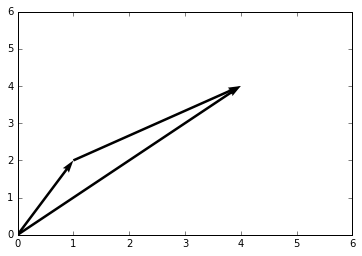

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline
#plotting 3 vectors

X = [0,1,0]
Y = [0,2,0]
U = [1,3,4]
V = [2,2,4]
# Actually make the plot.
plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
#plt.quiver(X2, Y2, U2, V2, angles = 'xy', scale_units = 'xy' ,scale=1)
# Set the x axis limits
plt.xlim([0,6])
# Set the y axis limits
plt.ylim([0,6])
# Show the plot.
plt.show()


<h2>Vector Length</h2>
<p>Because we can now plot vectors, we can apply geometric intuition to determine a vector's length</p>
<p>Take this vector as an example:</p>
<p>$\begin{bmatrix}
2 \\ 
3
\end{bmatrix}$</p>
<p>This vector is just the sum of these two:</p>
<p>$X = \begin{bmatrix}
2 \\ 
3
\end{bmatrix} = \begin{bmatrix}
0\\
3
\end{bmatrix} + \begin{bmatrix}
2 \\
0
\end{bmatrix}$</p>
<p>Breaking the vector down in this way results in the component vectors</p>
<p>Applying the pythagorean theorem, we can determine the length of the vector</p>
<p>$a^{2} + b^{2} = c^{2}$</p>

<p>$c=\sqrt{a^{2}+b^{2}}$</p>

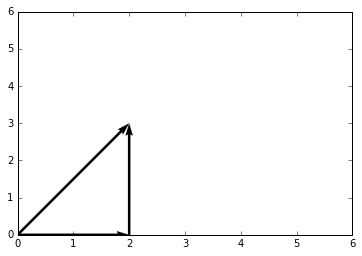

vector length:  3.605551275463989


In [139]:
X = [0,2,0]
Y = [0,0,0]
U = [2,0,2]
V = [0,3,3]
# Plot vector and component vectors
plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)

plt.xlim([0,6])
plt.ylim([0,6])
plt.show()
#calculate vector length using Pythagorean theorem
vector_length = (2**2 + 3**2)**.5
print("vector length: ", vector_length)

<h2>The Dot Product</h2>
<p>$\vec{a}\cdot\vec{b}=\begin{bmatrix}
a_{1} \\
a_{2} \\
a_{3}
\end{bmatrix} \cdot
\begin{bmatrix}
b_{1} \\
b_{2} \\
b_{3}
\end{bmatrix} = a_{1}b_{1} + a_{2}b_{2} + a_{3}b_{3}$</p>
<p>$\vec{a}$ and $\vec{b}$ are vectors. Taking the dot product tells us how much of the length of $\vec{a}$ is pointing in the same direction as $\vec{b}$ </p>
<p>If two vectors are perpendicular, the dot product will be 0. These are called <em>orthogonal</em>. If they are the same, their dot product will be the square of the vector length</p>

In [145]:
#different vectors
vecA = np.asarray([3,4,5,6])
vecB = np.asarray([5,6,7,8])
dot = sum(vecA*vecB)
print(dot)
#same vectors
vecC = np.asarray([3,4])
vecD = np.asarray([3,4])
vecCLength = (3**2+4**2)**.5
dot2 = sum(vecC*vecD)
print("Vector C Length", vecCLength)
print("C and D dot product", dot2)


122
Vector C Length 5.0
C and D dot product 25


<h2>Linear Regression Review</h2>
<p>"Predicted value of dependent variable is equal to the value of the independent variable times the slope plus the intercept"</p>
<p>Slope $m = (cov(x,y))/variance(x)$</p>
<p>Intercept $b = mean(y) - m * (mean(x))$</p>
<p>To apply a linear regression over a column, we simply take the value in the row and run it through the regression formula</p>
<p>However, we will often want to create linear regression models that take a coefficient for many columns of data</p>
<p>When we do this, the linear regression: $y=m_{1}x_{1}+m_{2}x_{2}+m_{3}x_{3}+m_{i}x_{i}+b$ can become computationally expensive if we simply loop through the rows and calculate the prediction for each column in the row</p>
<p>This is where matrix multiplication and dot products come in handy</p>

<h2>Vector and Matrix Multiplications</h2>
<p>Multiplying matrices helps us to perform linear regression much faster</p>
<p>Multiplying matrices is expressed in terms of rows and columns. e.g. 2x2 * 2x1</p>   
<p>To multiply matrices, they must have matching inner terms, i.e. must share the same number of columns in one as rows in another</p>
<p>More generally, if A is a 2x2 matrix and B is a 2x1 matrix</p>
<p>$\begin{bmatrix}
A11 & A12\\
A21 & A22
\end{bmatrix} * \begin{bmatrix}
B11 \\
B21
\end{bmatrix} = \begin{bmatrix}
(A11 * B11) + (A12 * B21) \\
(A21 * B11) + (A22 * B21)
\end{bmatrix}$</p>
<p>Even more generally, <a href="https://en.wikipedia.org/wiki/Matrix_multiplication">see wikipedia</a></p>

<p>Now if we think of a single column matrix representing the coeffecients of a linear regression, and another matrix representing our data:</p>
<p>$\begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \\ a_{31} & a_{32} \end{bmatrix} * \begin{bmatrix}
b_{11} \\
b_{21}
\end{bmatrix} 
= \begin{bmatrix}
a_{11} * b_{11} + a_{12} * b_{21} \\
a_{21} * b_{11} + a_{22} * b_{21} \\
a_{31} * b_{11} + a_{32} * b_{21}
\end{bmatrix}$</p>
<p>For example:</p>
<p>$\begin{bmatrix} 3 \\ -1 \end{bmatrix}$ can represent the linear equation $y=3x-1$</p>
<p>and we can represent our observations with the matrix (with the second column as 1 to allow for the intercept to be added)</p><p> $\begin{bmatrix}
2 & 1 \\
5 & 1 \\
-1 & 1
\end{bmatrix}$</p>
<p>Which allows us to do matrix multiplication like this:</p>
<p>$\begin{bmatrix} 2 & 1 \\ 5 & 1 \\ -1 & 1 \end{bmatrix} * \begin{bmatrix}
3 \\
-1
\end{bmatrix} 
= \begin{bmatrix}
2 * 3 + 1 * -1 \\
5 * 3 + 1 * -1 \\
-1 * 3 + 1 * -1
\end{bmatrix} = \begin{bmatrix}
5 \\
14 \\
-4
\end{bmatrix}$</p>

In [149]:
# With numpy, we can use the np.dot() method to multiply matrices
a_matrix = np.asarray([[2,1],[5,1],[-1,1]])
b_matrix = np.asarray([3,-1])
dot_product = np.dot(a_matrix, b_matrix)
print(dot_product)

[ 5 14 -4]


In [151]:
# As long as they line up along the M1 cols and M2 rows, we can multiply matrices of any size
c_matrix = np.asarray([[5,2], [3,5], [6,5]])
d_matrix = np.asarray([[3,1], [4,2]])
dot_product_c_d = np.dot(c_matrix, d_matrix)
print(dot_product_c_d)


[[23  9]
 [29 13]
 [38 16]]
